<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Odisha/CongressOdisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 233, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (227/227), done.
remote: Total 648 (delta 108), reused 0 (delta 0), pack-reused 415
Receiving objects: 100% (648/648), 32.28 MiB | 20.41 MiB/s, done.
Resolving deltas: 100% (275/275), done.


In [64]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"naveen patnaik"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('congress_odisha.csv',index = False)

2020-11-21 20:46:00
1330251135064674304
False
@anand_mishra98 @PandaJay What after Naveen Patnaik? How long will he continue?
Age must also support him. Energy is needed to run a state.
GharWapasi_
Banaras
Twitter for Android
1
5301
1098
0
<--------------------------------------------------->
1
2020-11-21 19:34:52
1330233236069474306
False
Naveen Patnaik writes to Hemant Soren for early completion of Ichha dam 
https://t.co/vwTfwUnLXd
SanjDeep7
New Delhi-Daman 
LinkedIn
0
575
8
0
<--------------------------------------------------->
2
2020-11-21 19:33:33
1330232905885507585
False
Naveen Patnaik writes to Hemant Soren for early completion of Ichha dam 
https://t.co/203j0Csx5I
TheGlobalRealty
New Delhi, India
Twitter Web App
0
96
48
0
<--------------------------------------------------->
3
2020-11-21 19:22:30
1330230124147593216
False
Naveen Patnaik writes to Hemant Soren for early completion of Ichha dam https://t.co/bhFZIvaZIZ
SanjDeep7
New Delhi-Daman 
LinkedIn
0
575
8
0
<------------

In [65]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       153 non-null    datetime64[ns]
 1   Tweet_id   153 non-null    int64         
 2   Verified   153 non-null    bool          
 3   Tweet      153 non-null    object        
 4   User       153 non-null    object        
 5   Location   153 non-null    object        
 6   Source     153 non-null    object        
 7   Likes      153 non-null    int64         
 8   Followers  153 non-null    int64         
 9   Following  153 non-null    int64         
 10  Retweets   153 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 12.2+ KB


In [67]:
df.shape

(153, 11)

In [68]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [69]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [70]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [71]:
df['Source'].value_counts()

Twitter for Android       57
Twitter Web App           48
TweetDeck                 14
Twitter for iPhone         8
Buffer                     7
WordPress.com              6
LinkedIn                   3
Twitter Media Studio       2
ht-twitter-handler         1
dlvr.it                    1
Devdiscourse News Desk     1
Cloohawk                   1
IFTTT                      1
PTI_Tweets                 1
cmssocialservice           1
Twitter for iPad           1
Name: Source, dtype: int64

In [72]:
df['Location'].nunique()

52

In [73]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

153

In [74]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)

150

In [75]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [76]:
df['Tweet'].duplicated().sum()

3

In [77]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(150, 11)

In [78]:
df['Tweet'].duplicated().sum()

0

In [79]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [80]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [81]:
df.shape

(150, 12)

In [82]:
df['Processed_Tweet']

0      @anand_mishra98 @PandaJay What after Naveen Pa...
1      Naveen Patnaik writes to Hemant Soren for earl...
2      Naveen Patnaik writes to Hemant Soren for earl...
3      Naveen Patnaik writes to Hemant Soren for earl...
4      Naveen Patnaik writes to Hemant Soren for earl...
                             ...                        
145    @Naveen_Odisha Honourable Chief Minister Mr. N...
146    @Naveen_Odisha Free and Fair Media is a backbo...
147    Naveen Patnaik says government will look into ...
148    Naveen Patnaik says government will look into ...
149    Odisha Governor Ganeshi Lal and CM Naveen Patn...
Name: Processed_Tweet, Length: 150, dtype: object

In [83]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0      @anand_mishra98 @PandaJay What after Naveen Pa...
1      Naveen Patnaik writes to Hemant Soren for earl...
2      Naveen Patnaik writes to Hemant Soren for earl...
3      Naveen Patnaik writes to Hemant Soren for earl...
4      Naveen Patnaik writes to Hemant Soren for earl...
                             ...                        
145    @Naveen_Odisha Honourable Chief Minister Mr. N...
146    @Naveen_Odisha Free and Fair Media is a backbo...
147    Naveen Patnaik says government will look into ...
148    Naveen Patnaik says government will look into ...
149    Odisha Governor Ganeshi Lal and CM Naveen Patn...
Name: Processed_Tweet, Length: 150, dtype: object

In [85]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0          What after Naveen Patnaik? How long will h...
1      Naveen Patnaik writes to Hemant Soren for earl...
2      Naveen Patnaik writes to Hemant Soren for earl...
3      Naveen Patnaik writes to Hemant Soren for earl...
4      Naveen Patnaik writes to Hemant Soren for earl...
                             ...                        
145      Honourable Chief Minister Mr. Naveen Patnaik...
146      Free and Fair Media is a backbone of our soc...
147    Naveen Patnaik says government will look into ...
148    Naveen Patnaik says government will look into ...
149    Odisha Governor Ganeshi Lal and CM Naveen Patn...
Name: Processed_Tweet, Length: 150, dtype: object

In [86]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0          What after Naveen Patnaik? How long will h...
1      Naveen Patnaik writes to Hemant Soren for earl...
2      Naveen Patnaik writes to Hemant Soren for earl...
3      Naveen Patnaik writes to Hemant Soren for earl...
4      Naveen Patnaik writes to Hemant Soren for earl...
                             ...                        
145      Honourable Chief Minister Mr. Naveen Patnaik...
146      Free and Fair Media is a backbone of our soc...
147    Naveen Patnaik says government will look into ...
148    Naveen Patnaik says government will look into ...
149    Odisha Governor Ganeshi Lal and CM Naveen Patn...
Name: Processed_Tweet, Length: 150, dtype: object

In [87]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0          What after Naveen Patnaik? How long will h...
1      Naveen Patnaik writes to Hemant Soren for earl...
2      Naveen Patnaik writes to Hemant Soren for earl...
3      Naveen Patnaik writes to Hemant Soren for earl...
4      Naveen Patnaik writes to Hemant Soren for earl...
                             ...                        
145      Honourable Chief Minister Mr. Naveen Patnaik...
146      Free and Fair Media is a backbone of our soc...
147    Naveen Patnaik says government will look into ...
148    Naveen Patnaik says government will look into ...
149    Odisha Governor Ganeshi Lal and CM Naveen Patn...
Name: Processed_Tweet, Length: 150, dtype: object

In [88]:
!pip install tweet-preprocessor

In [89]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0      What after Naveen Patnaik? How long will he co...
1      Naveen Patnaik writes to Hemant Soren for earl...
2      Naveen Patnaik writes to Hemant Soren for earl...
3      Naveen Patnaik writes to Hemant Soren for earl...
4      Naveen Patnaik writes to Hemant Soren for earl...
                             ...                        
145    Honourable Chief Minister Mr. Naveen Patnaik a...
146    Free and Fair Media is a backbone of our socie...
147    Naveen Patnaik says government will look into ...
148    Naveen Patnaik says government will look into ...
149    Odisha Governor Ganeshi Lal and CM Naveen Patn...
Name: Processed_Tweet, Length: 150, dtype: object

In [90]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0      What after Naveen Patnaik  How long will he co...
1      Naveen Patnaik writes to Hemant Soren for earl...
2      Naveen Patnaik writes to Hemant Soren for earl...
3      Naveen Patnaik writes to Hemant Soren for earl...
4      Naveen Patnaik writes to Hemant Soren for earl...
                             ...                        
145    Honourable Chief Minister Mr  Naveen Patnaik a...
146    Free and Fair Media is a backbone of our socie...
147    Naveen Patnaik says government will look into ...
148    Naveen Patnaik says government will look into ...
149    Odisha Governor Ganeshi Lal and CM Naveen Patn...
Name: Processed_Tweet, Length: 150, dtype: object

In [91]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0      what after naveen patnaik  how long will he co...
1      naveen patnaik writes to hemant soren for earl...
2      naveen patnaik writes to hemant soren for earl...
3      naveen patnaik writes to hemant soren for earl...
4      naveen patnaik writes to hemant soren for earl...
                             ...                        
145    honourable chief minister mr  naveen patnaik a...
146    free and fair media is a backbone of our socie...
147    naveen patnaik says government will look into ...
148    naveen patnaik says government will look into ...
149    odisha governor ganeshi lal and cm naveen patn...
Name: Processed_Tweet, Length: 150, dtype: object

In [92]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'you have chosen the most hypocrite media personalities you could ever put your faith on  wish you good luck if you think they d raise their voice against naveen patnaik govt lutyens cabal '

In [93]:
df['User'].value_counts()

otvnews            9
BinayPrasadDas3    6
OmmcomNews         5
news18dotcom       4
TOIBhubaneswar     3
                  ..
GharWapasi_        1
NavjyotiPatnaik    1
Umesh91930549      1
MrGladPortBlair    1
debesh_bjd         1
Name: User, Length: 116, dtype: int64

In [94]:
df.query('User == "rahul"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


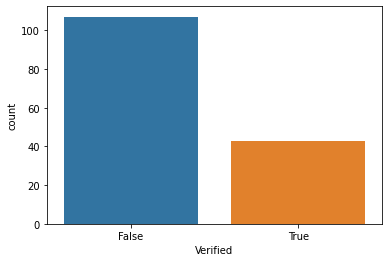

In [95]:
bar = sns.countplot(df['Verified'])

In [96]:
df['Verified'].value_counts()

False    107
True      43
Name: Verified, dtype: int64

In [97]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

otvnews            9
news18dotcom       4
TOIBhubaneswar     3
XpressOdisha       2
thewire_in         2
IPR_Odisha         2
htTweets           1
livemint           1
EconomicTimes      1
ANI                1
NavjyotiPatnaik    1
NewIndianXpress    1
moneycontrolcom    1
OpIndia_com        1
AltNews            1
NewsMobileIndia    1
svaradarajan       1
indiatvnews        1
Outlookindia       1
PTI_News           1
TOICitiesNews      1
HindustanTimes     1
zoo_bear           1
boomlive_in        1
free_thinker       1
debesh_bjd         1
CNNnews18          1
Name: User, dtype: int64

In [98]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 3, 16: 13, 17: 23, 18: 31, 19: 22, 20: 17, 21: 41})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

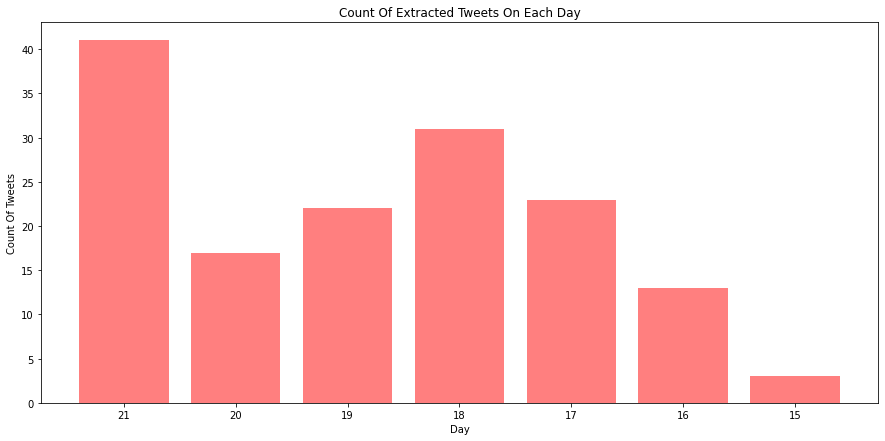

In [99]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [100]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({2: 3,
         3: 10,
         4: 6,
         5: 3,
         6: 10,
         7: 3,
         8: 4,
         9: 6,
         10: 8,
         11: 3,
         12: 8,
         13: 11,
         14: 20,
         15: 12,
         16: 11,
         17: 13,
         18: 9,
         19: 6,
         20: 1,
         21: 2,
         22: 1})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

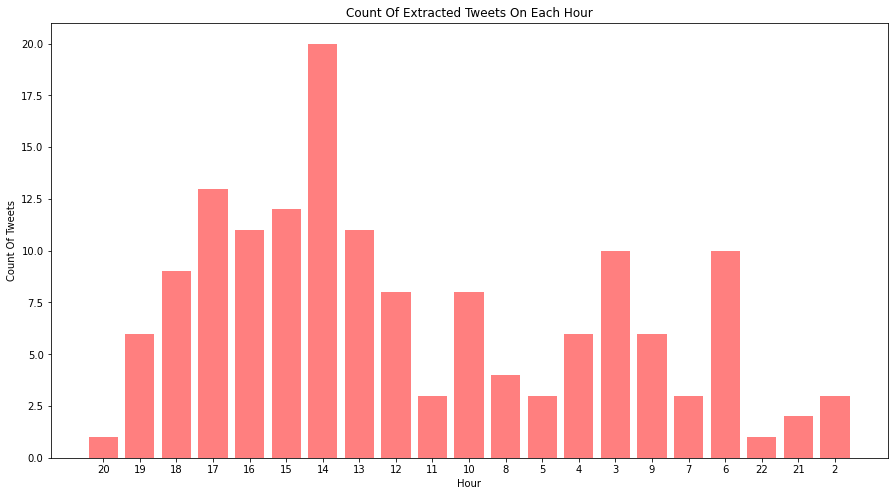

In [101]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [102]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [103]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [104]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['my', 'him', 'has', 'under', 'against', "hasn't", 'between', 'this', 'was', 'ain', 'it', 'through', 'mightn', 'most', 'on', 'ours', 'me', "she's", "you've", 'in', 'doesn', 'don', 'only', 'isn', 'just', 'we', 'himself', 'their', 'there', "mustn't", 'her', 'because', 'had', 'haven', 'your', 'herself', 'if', 'than', 'his', 'too', "needn't", "you're", "you'll", 'why', 'such', 'so', "doesn't", 're', 'didn', 'no', 'whom', 'do', "wasn't", 'is', 'are', 'its', 't', 'an', 'here', "don't", 'he', 'by', "wouldn't", "haven't", 'shan', 'been', 'over', 'or', 'be', 'at', 'wouldn', 'hadn', 'you', 'aren', "it's", 'myself', 'they', 'being', 'to', 'but', 'as', 'during', 'wasn', 'should', "you'd", 'where', 'up', 'while', 'them', "won't", 'out', "hadn't", 'yourselves', 'those', 'how', 'ourselves', 'couldn', 'then', 'hasn', 'not', 'ma', 'few', 'what', "that'll", "shan't", "aren't", 'now', 'that', 'needn', 's', 'won', 'into', 'other', 'further', 'off', 'from', 'weren', 'does', 'll', 'below', 'and', 'having', 

In [105]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0      naveen patnaik long continue age must also sup...
1      naveen patnaik writes hemant soren early compl...
2      naveen patnaik writes hemant soren early compl...
3      naveen patnaik writes hemant soren early compl...
4      naveen patnaik writes hemant soren early compl...
                             ...                        
145    honourable chief minister mr naveen patnaik ad...
146    free fair media backbone society independent m...
147    naveen patnaik says government look vedanta issue
148    naveen patnaik says government look vedanta issue
149    odisha governor ganeshi lal cm naveen patnaik ...
Name: Processed_Tweet, Length: 150, dtype: object

In [106]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0      [naveen, patnaik, long, continue, age, must, a...
1      [naveen, patnaik, writes, hemant, soren, early...
2      [naveen, patnaik, writes, hemant, soren, early...
3      [naveen, patnaik, writes, hemant, soren, early...
4      [naveen, patnaik, writes, hemant, soren, early...
                             ...                        
145    [honourable, chief, minister, mr, naveen, patn...
146    [free, fair, media, backbone, society, indepen...
147    [naveen, patnaik, says, government, look, veda...
148    [naveen, patnaik, says, government, look, veda...
149    [odisha, governor, ganeshi, lal, cm, naveen, p...
Name: Processed_Tweet, Length: 150, dtype: object

In [107]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0      [naveen, patnaik, long, continu, age, must, al...
1      [naveen, patnaik, write, hemant, soren, earli,...
2      [naveen, patnaik, write, hemant, soren, earli,...
3      [naveen, patnaik, write, hemant, soren, earli,...
4      [naveen, patnaik, write, hemant, soren, earli,...
                             ...                        
145    [honour, chief, minist, mr, naveen, patnaik, a...
146    [free, fair, media, backbon, societi, independ...
147    [naveen, patnaik, say, govern, look, vedanta, ...
148    [naveen, patnaik, say, govern, look, vedanta, ...
149    [odisha, governor, ganeshi, lal, cm, naveen, p...
Name: Processed_Tweet, Length: 150, dtype: object

In [108]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 20:46:00,1330251135064674304,False,@anand_mishra98 @PandaJay What after Naveen Pa...,GharWapasi_,Banaras,Twitter for Android,1,5301,1098,0,"[naveen, patnaik, long, continu, age, must, al..."
1,2020-11-21 19:34:52,1330233236069474306,False,Naveen Patnaik writes to Hemant Soren for earl...,SanjDeep7,New Delhi-Daman,LinkedIn,0,575,8,0,"[naveen, patnaik, write, hemant, soren, earli,..."
2,2020-11-21 19:33:33,1330232905885507585,False,Naveen Patnaik writes to Hemant Soren for earl...,TheGlobalRealty,"New Delhi, India",Twitter Web App,0,96,48,0,"[naveen, patnaik, write, hemant, soren, earli,..."
3,2020-11-21 19:22:30,1330230124147593216,False,Naveen Patnaik writes to Hemant Soren for earl...,SanjDeep7,New Delhi-Daman,LinkedIn,0,575,8,0,"[naveen, patnaik, write, hemant, soren, earli,..."
4,2020-11-21 19:21:31,1330229874284498945,False,Naveen Patnaik writes to Hemant Soren for earl...,NPM_Magazine,India,Twitter Web App,0,55,220,0,"[naveen, patnaik, write, hemant, soren, earli,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
145,2020-11-16 04:52:35,1328199262681776128,False,@Naveen_Odisha Honourable Chief Minister Mr. N...,DeepikaBasu1,,TweetDeck,0,34,23,0,"[honour, chief, minist, naveen, patnaik, addre..."
146,2020-11-16 04:42:26,1328196707566305282,False,@Naveen_Odisha Free and Fair Media is a backbo...,pradyumanpal,"Orissa, India",Twitter for Android,0,218,110,0,"[free, fair, media, backbon, societi, independ..."
147,2020-11-15 19:08:23,1328052242889510914,False,Naveen Patnaik says government will look into ...,SanjDeep7,New Delhi-Daman,LinkedIn,0,575,8,0,"[naveen, patnaik, say, govern, look, vedanta, ..."
148,2020-11-15 19:07:17,1328051965822046208,False,Naveen Patnaik says government will look into ...,BMirror,"New Delhi, India",Twitter Web App,0,37,48,0,"[naveen, patnaik, say, govern, look, vedanta, ..."


In [109]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

2338

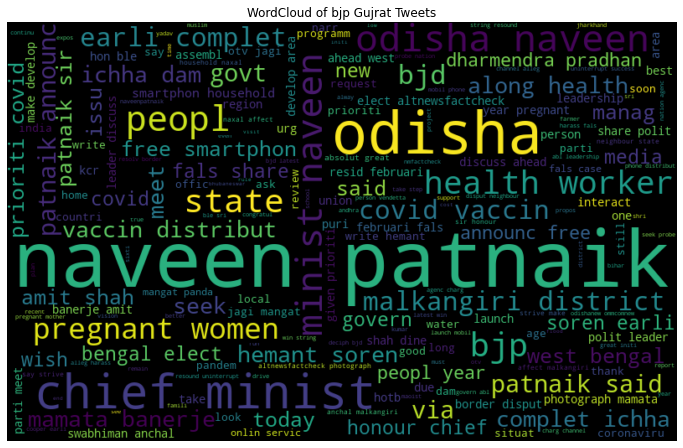

In [110]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of bjp Gujrat Tweets")
plt.show()

In [111]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

150

In [112]:
len(text)

2338

In [113]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 77
Negative Tweets: 10
Neutral Tweets 63


In [114]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [115]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [116]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.000,0.803,0.197,0.4019
1,0.000,1.000,0.000,0.0000
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
145,0.000,0.684,0.316,0.5719
146,0.000,0.752,0.248,0.6808
147,0.000,1.000,0.000,0.0000
148,0.000,1.000,0.000,0.0000


In [117]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.0,0.803,0.197,0.4019,Positive
1,0.0,1.000,0.000,0.0000,Neutral
2,0.0,1.000,0.000,0.0000,Neutral
3,0.0,1.000,0.000,0.0000,Neutral
4,0.0,1.000,0.000,0.0000,Neutral


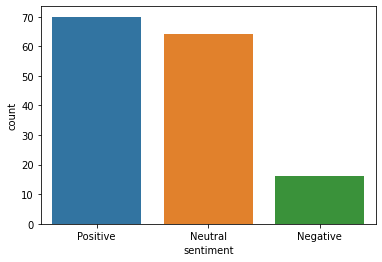

In [118]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [121]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Odisha/congress_odisha.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

204

In [122]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [125]:
word_emotion=dict()
for i in range(0,204):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [ ]:
from numpy import nan
nan == nan


False

In [ ]:
for i in range(0,150):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

In [ ]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

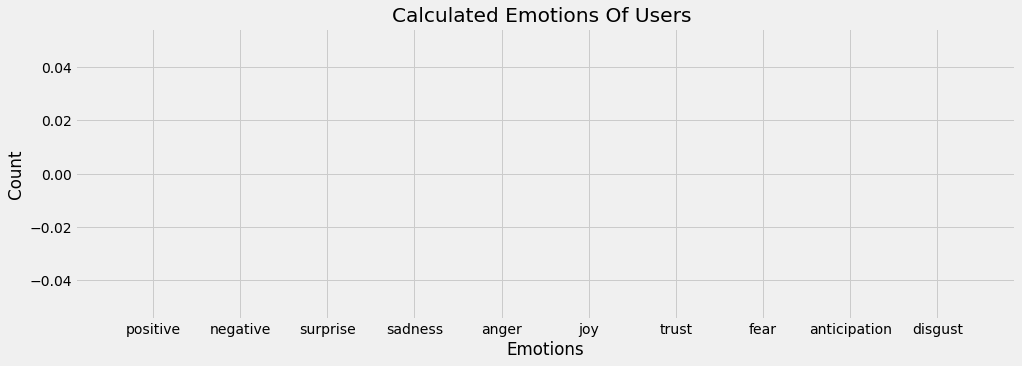

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [127]:
df.Location  = df.Location.fillna('INDIA')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [128]:
df.Location = df.Location.apply(lambda x: x.replace('orissa','odisha'))
df.Location.value_counts()

                                                                 39
India                                                            17
Bhubaneswar, India                                               11
Bhubaneshwar, India                                               8
Bhubaneswar                                                       7
New Delhi, India                                                  7
Cuttack, Odisha, India                                            6
Odisha, India                                                     3
New Delhi-Daman                                                   3
Mumbai, India                                                     2
New Delhi                                                         2
Mumbai                                                            2
Odisha                                                            2
India,odisha,swostipremium                                        2
Ahmedabad                                       

In [129]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 20:46:00,1330251135064674304,False,@anand_mishra98 @PandaJay What after Naveen Pa...,GharWapasi_,Banaras,Twitter for Android,1,5301,1098,0,"[naveen, patnaik, long, continu, age, must, al...",Banaras
1,2020-11-21 19:34:52,1330233236069474306,False,Naveen Patnaik writes to Hemant Soren for earl...,SanjDeep7,New Delhi-Daman,LinkedIn,0,575,8,0,"[naveen, patnaik, write, hemant, soren, earli,...",New Delhi-Daman
2,2020-11-21 19:33:33,1330232905885507585,False,Naveen Patnaik writes to Hemant Soren for earl...,TheGlobalRealty,"New Delhi, India",Twitter Web App,0,96,48,0,"[naveen, patnaik, write, hemant, soren, earli,...",New Delhi
3,2020-11-21 19:22:30,1330230124147593216,False,Naveen Patnaik writes to Hemant Soren for earl...,SanjDeep7,New Delhi-Daman,LinkedIn,0,575,8,0,"[naveen, patnaik, write, hemant, soren, earli,...",New Delhi-Daman
4,2020-11-21 19:21:31,1330229874284498945,False,Naveen Patnaik writes to Hemant Soren for earl...,NPM_Magazine,India,Twitter Web App,0,55,220,0,"[naveen, patnaik, write, hemant, soren, earli,...",India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2020-11-16 04:52:35,1328199262681776128,False,@Naveen_Odisha Honourable Chief Minister Mr. N...,DeepikaBasu1,,TweetDeck,0,34,23,0,"[honour, chief, minist, naveen, patnaik, addre...",
146,2020-11-16 04:42:26,1328196707566305282,False,@Naveen_Odisha Free and Fair Media is a backbo...,pradyumanpal,"Orissa, India",Twitter for Android,0,218,110,0,"[free, fair, media, backbon, societi, independ...",Orissa
147,2020-11-15 19:08:23,1328052242889510914,False,Naveen Patnaik says government will look into ...,SanjDeep7,New Delhi-Daman,LinkedIn,0,575,8,0,"[naveen, patnaik, say, govern, look, vedanta, ...",New Delhi-Daman
148,2020-11-15 19:07:17,1328051965822046208,False,Naveen Patnaik says government will look into ...,BMirror,"New Delhi, India",Twitter Web App,0,37,48,0,"[naveen, patnaik, say, govern, look, vedanta, ...",New Delhi


In [130]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [131]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 20:46:00,1330251135064674304,False,@anand_mishra98 @PandaJay What after Naveen Pa...,GharWapasi_,Banaras,Twitter for Android,1,5301,1098,0,"[naveen, patnaik, long, continu, age, must, al...",Banaras,Positive,21
1,2020-11-21 19:34:52,1330233236069474306,False,Naveen Patnaik writes to Hemant Soren for earl...,SanjDeep7,New Delhi-Daman,LinkedIn,0,575,8,0,"[naveen, patnaik, write, hemant, soren, earli,...",New Delhi-Daman,Neutral,21
2,2020-11-21 19:33:33,1330232905885507585,False,Naveen Patnaik writes to Hemant Soren for earl...,TheGlobalRealty,"New Delhi, India",Twitter Web App,0,96,48,0,"[naveen, patnaik, write, hemant, soren, earli,...",New Delhi,Neutral,21
3,2020-11-21 19:22:30,1330230124147593216,False,Naveen Patnaik writes to Hemant Soren for earl...,SanjDeep7,New Delhi-Daman,LinkedIn,0,575,8,0,"[naveen, patnaik, write, hemant, soren, earli,...",New Delhi-Daman,Neutral,21
4,2020-11-21 19:21:31,1330229874284498945,False,Naveen Patnaik writes to Hemant Soren for earl...,NPM_Magazine,India,Twitter Web App,0,55,220,0,"[naveen, patnaik, write, hemant, soren, earli,...",India,Neutral,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


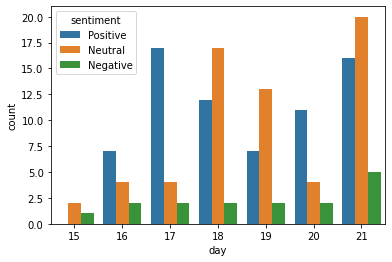

In [132]:
sns.countplot(df['day'],hue = df['sentiment'])

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [134]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 20:46:00,1330251135064674304,False,@anand_mishra98 @PandaJay What after Naveen Pa...,GharWapasi_,Banaras,Twitter for Android,1,5301,1098,0,"[naveen, patnaik, long, continu, age, must, al...",Banaras,Positive,21,2
1,2020-11-21 19:34:52,1330233236069474306,False,Naveen Patnaik writes to Hemant Soren for earl...,SanjDeep7,New Delhi-Daman,LinkedIn,0,575,8,0,"[naveen, patnaik, write, hemant, soren, earli,...",New Delhi-Daman,Neutral,21,1
2,2020-11-21 19:33:33,1330232905885507585,False,Naveen Patnaik writes to Hemant Soren for earl...,TheGlobalRealty,"New Delhi, India",Twitter Web App,0,96,48,0,"[naveen, patnaik, write, hemant, soren, earli,...",New Delhi,Neutral,21,1
3,2020-11-21 19:22:30,1330230124147593216,False,Naveen Patnaik writes to Hemant Soren for earl...,SanjDeep7,New Delhi-Daman,LinkedIn,0,575,8,0,"[naveen, patnaik, write, hemant, soren, earli,...",New Delhi-Daman,Neutral,21,1
4,2020-11-21 19:21:31,1330229874284498945,False,Naveen Patnaik writes to Hemant Soren for earl...,NPM_Magazine,India,Twitter Web App,0,55,220,0,"[naveen, patnaik, write, hemant, soren, earli,...",India,Neutral,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2020-11-16 04:52:35,1328199262681776128,False,@Naveen_Odisha Honourable Chief Minister Mr. N...,DeepikaBasu1,,TweetDeck,0,34,23,0,"[honour, chief, minist, naveen, patnaik, addre...",,Positive,16,2
146,2020-11-16 04:42:26,1328196707566305282,False,@Naveen_Odisha Free and Fair Media is a backbo...,pradyumanpal,"Orissa, India",Twitter for Android,0,218,110,0,"[free, fair, media, backbon, societi, independ...",Orissa,Positive,16,2
147,2020-11-15 19:08:23,1328052242889510914,False,Naveen Patnaik says government will look into ...,SanjDeep7,New Delhi-Daman,LinkedIn,0,575,8,0,"[naveen, patnaik, say, govern, look, vedanta, ...",New Delhi-Daman,Neutral,15,1
148,2020-11-15 19:07:17,1328051965822046208,False,Naveen Patnaik says government will look into ...,BMirror,"New Delhi, India",Twitter Web App,0,37,48,0,"[naveen, patnaik, say, govern, look, vedanta, ...",New Delhi,Neutral,15,1


In [135]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [137]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [138]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.6666666666666666
Precision Score:  0.6666666666666666
Recall Score:  0.6666666666666666
F1 Score:  0.6666666666666666


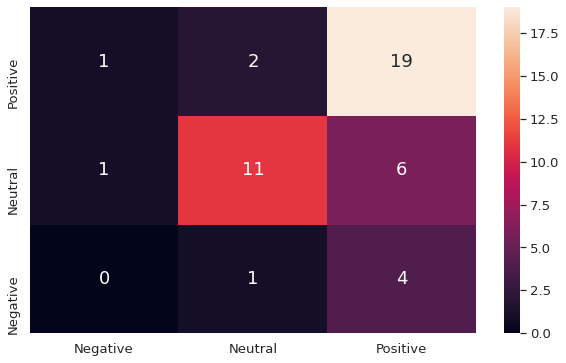

In [139]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [140]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [141]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [142]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.6536363636363636
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 9, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [144]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.6888888888888889
Precision Score:  0.6888888888888889
Recall Score:  0.6888888888888889
F1 Score:  0.6888888888888889


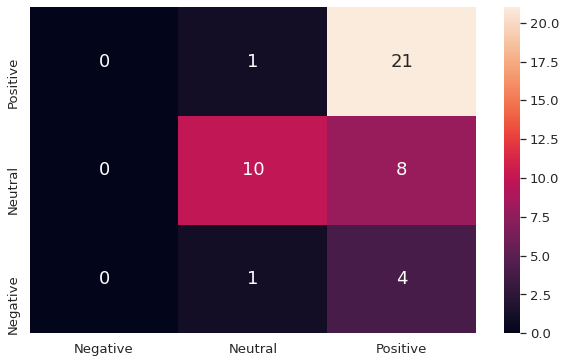

In [145]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [146]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [147]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.6888888888888889
Precision Score:  0.6888888888888889
Recall Score:  0.6888888888888889
F1 Score:  0.6888888888888889


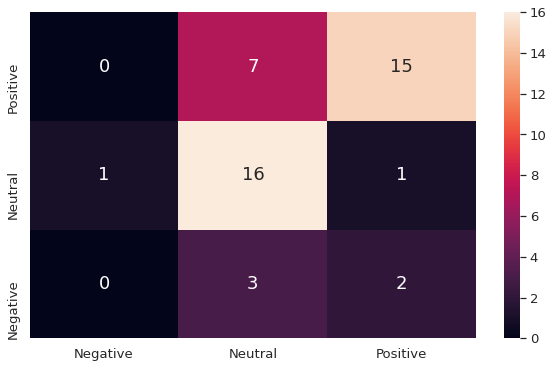

In [148]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [149]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [150]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1300, max_depth=12, criterion=entropy ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1300, max_depth=12, criterion=entropy, score=0.714, total=   1.9s
[CV] n_estimators=1300, max_depth=12, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=1300, max_depth=12, criterion=entropy, score=0.762, total=   1.9s
[CV] n_estimators=1300, max_depth=12, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


[CV]  n_estimators=1300, max_depth=12, criterion=entropy, score=0.762, total=   1.8s
[CV] n_estimators=1300, max_depth=12, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.6s remaining:    0.0s


[CV]  n_estimators=1300, max_depth=12, criterion=entropy, score=0.476, total=   1.9s
[CV] n_estimators=1300, max_depth=12, criterion=entropy ..............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.4s remaining:    0.0s


[CV]  n_estimators=1300, max_depth=12, criterion=entropy, score=0.714, total=   1.8s
[CV] n_estimators=1200, max_depth=15, criterion=gini .................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.3s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=15, criterion=gini, score=0.714, total=   1.7s
[CV] n_estimators=1200, max_depth=15, criterion=gini .................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   11.0s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=15, criterion=gini, score=0.762, total=   1.7s
[CV] n_estimators=1200, max_depth=15, criterion=gini .................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   12.7s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=15, criterion=gini, score=0.762, total=   1.7s
[CV] n_estimators=1200, max_depth=15, criterion=gini .................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   14.4s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=15, criterion=gini, score=0.571, total=   1.8s
[CV] n_estimators=1200, max_depth=15, criterion=gini .................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   16.2s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=15, criterion=gini, score=0.714, total=   1.7s
[CV] n_estimators=1200, max_depth=1, criterion=gini ..................
[CV]  n_estimators=1200, max_depth=1, criterion=gini, score=0.571, total=   1.5s
[CV] n_estimators=1200, max_depth=1, criterion=gini ..................
[CV]  n_estimators=1200, max_depth=1, criterion=gini, score=0.571, total=   1.5s
[CV] n_estimators=1200, max_depth=1, criterion=gini ..................
[CV]  n_estimators=1200, max_depth=1, criterion=gini, score=0.476, total=   1.6s
[CV] n_estimators=1200, max_depth=1, criterion=gini ..................
[CV]  n_estimators=1200, max_depth=1, criterion=gini, score=0.476, total=   1.6s
[CV] n_estimators=1200, max_depth=1, criterion=gini ..................
[CV]  n_estimators=1200, max_depth=1, criterion=gini, score=0.619, total=   1.5s
[CV] n_estimators=1000, max_depth=3, criterion=entropy ...............
[CV]  n_estimators=1000, max_depth=3, criterion=entropy, score=0.667, total=   1.4s
[CV

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


0.7047619047619047
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [151]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.6888888888888889
Precision Score:  0.6888888888888889
Recall Score:  0.6888888888888889
F1 Score:  0.6888888888888889


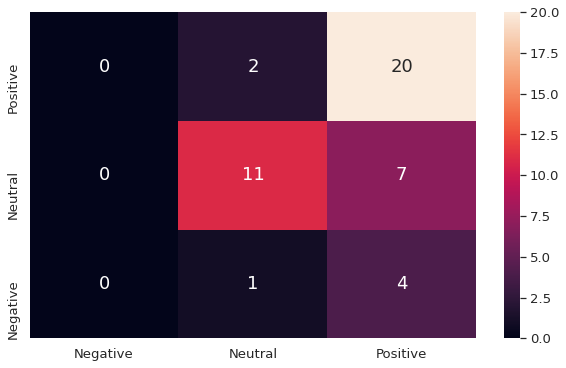

In [152]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [153]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.6888888888888889
Precision Score:  0.6888888888888889
Recall Score:  0.6888888888888889
F1 Score:  0.6888888888888889


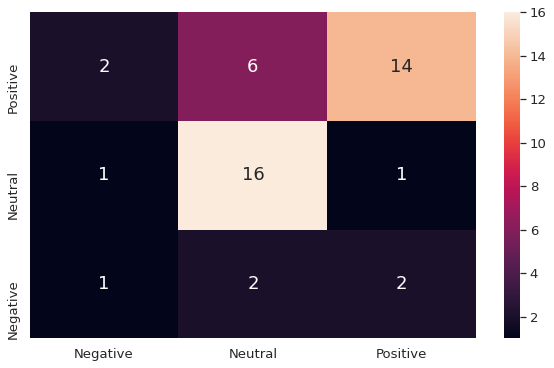

In [154]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [155]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [156]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.6663636363636364
{'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [157]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.6888888888888889
Precision Score:  0.6888888888888889
Recall Score:  0.6888888888888889
F1 Score:  0.6888888888888889


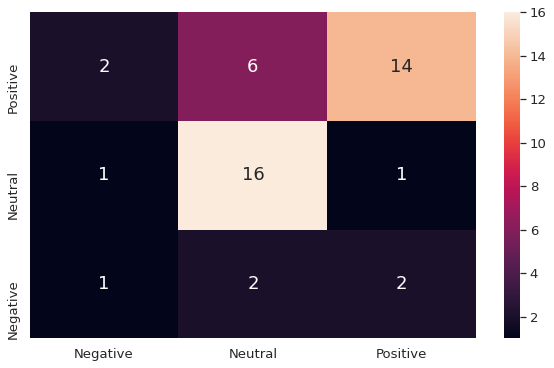

In [158]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

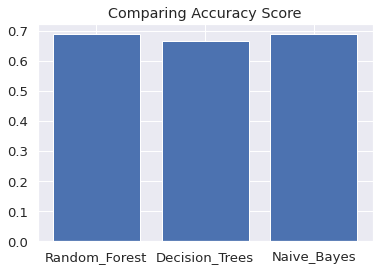

In [159]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

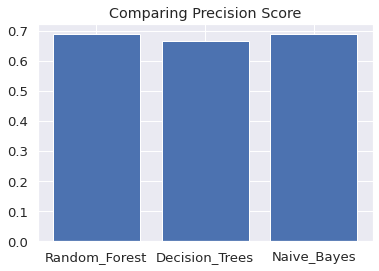

In [160]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

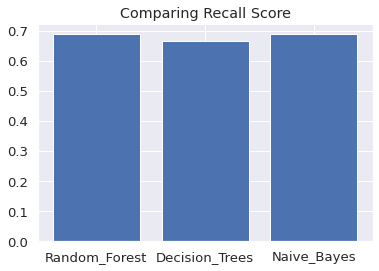

In [161]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

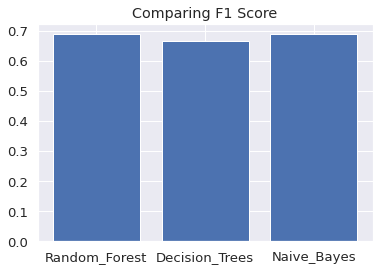

In [162]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()